In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [15]:
df = pd.read_csv('cars_multivariate.txt')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [16]:
# changing horsepower to hp and strings to numbers
df['hp'] = pd.to_numeric(df.horsepower, errors='coerce')
df = df[df.hp.notnull()]

# setting my dependent and independent variables
y = df.mpg
X = df.drop(['mpg', 'origin', 'car_name', 'model', 'horsepower'], axis=1)

# adding a bias/y-intercept
X = sm.add_constant(X)

In [17]:
y.head(1)

0    18.0
Name: mpg, dtype: float64

In [18]:
X.head(1)

,const,cylinders,displacement,weight,acceleration,hp
0,1.0,8,307.0,3504.0,12.0,130.0


In [19]:
# fit with statsmodels
model1 = sm.OLS(y,X)
results = model1.fit()

Text(0,0.5,'studentized residuals')

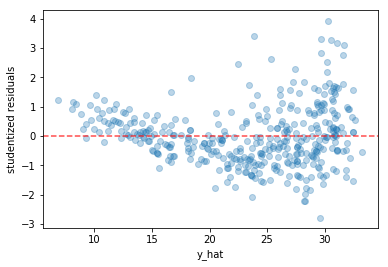

In [59]:
# plot studentized residuals
st_res = results.outlier_test()['student_resid']
yhat = results.fittedvalues
plt.scatter(yhat, st_res, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('y_hat')
plt.ylabel('studentized residuals')

Figure(432x288)


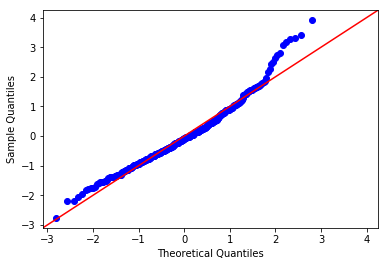

In [69]:
# qq plot
print(qqplot(st_res, line='45', fit=True))